### Models

#### Model Options
- Linear Regression (or Kernelized Regression)
  - KernelDensity(kernel='linear')
- K-Nearest Neighbors
  - KernelDensity()
- Gaussian Processes
  - KernelDensity(kernel='gaussian')
- Neural Networks
- Random Forest Regressor
- Adaptive or Gradient Boosting Regressor
- "linear", "gaussian", 

In [55]:
import numpy as np
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as stats
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

In [56]:
data = "data/train.csv"
df = pd.read_csv(data)

In [57]:
# extract the features & target variable from the dataframe

X = df.iloc[:,:-1]
y = df.iloc[:,-1:]
    # alt method: y = df['target']


#### Data Exploration: Target 

In [58]:
y.head()

stats_df = y.describe()
stats_df.loc['range'] = [float(stats_df.loc['max']) - float(stats_df.loc['min'])]
# ["count", "mean", "std", "min", "q1", "q2", "q3", "max"]

stats_df

,target
count,8250.000000
mean,0.867212
std,0.405036
min,-0.000000
25%,0.600000
50%,0.800000
75%,1.100000
max,3.500000
range,3.500000


In [59]:
# compute basic descriptive statistics for the target variable
mean = np.mean(y)
median = np.median(y)
std_dev = np.std(y)
min_val = np.min(y)
max_val = np.max(y)
y_range = max_val - min_val

print("Mean:", mean)
print("Median:", median)
print("Standard Deviation:", std_dev)
print("Minimum Value:", min_val)
print("Maximum Value:", max_val)
print("Range:", y_range)


Mean: target    0.867212
dtype: float64
Median: 0.8
Standard Deviation: target    0.405011
dtype: float64
Minimum Value: target   -0.0
dtype: float64
Maximum Value: target    3.5
dtype: float64
Range: target    3.5
dtype: float64


/Users/eleanorbrock/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/eleanorbrock/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/Users/eleanorbrock/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkw

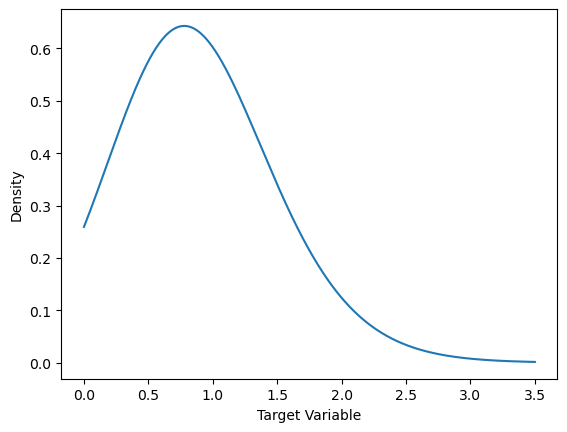

In [60]:
# create a kernel density estimate of the target's distribution
kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(y.to_numpy().reshape(-1,1))

# create a set of x-values at which to evaluate the KDE
x_vals = np.linspace(min_val, max_val, 1000).reshape(-1,1)

# get the corresponding y-values by evaluating the KDE at the x-values 
y_vals = np.exp(kde.score_samples(x_vals))

# plot the KDE
plt.plot(x_vals, y_vals)
plt.xlabel('Target Variable')
plt.ylabel('Density')
plt.show()

# Alternative methods
# sns.displot(y, kind="kde")
# sns.kdeplot(y)

#### Data Exploration: Features

In [8]:
X.head()

feat_df = X.describe()

range_list = []
for each in feat_df.columns:
    range_list.append(float(feat_df[each]['max']) - float(feat_df[each]['min']))

feat_df.loc['range'] = range_list
feat_df


,acc_rate,track,m,n,current_pitch,current_roll,absoluate_roll,climb_delta,roll_rate_delta,climb_delta_diff,...,time7_delta,time8_delta,time9_delta,time10_delta,time11_delta,time12_delta,time13_delta,time14_delta,omega,set
count,8250.000000,8250.000000,8250.000000,8250.000000,8250.000000,8250.000000,8250.000000,8250.000000,8250.000000,8250.000000,...,8250.000000,8.250000e+03,8250.000000,8.250000e+03,8250.000000,8.250000e+03,8250.000000,8250.000000,8250.000000,8250.000000
mean,-11.526061,-12.672970,1.051280,0.060387,0.629371,0.061248,-11.004848,-0.920364,-0.000957,-0.047842,...,-0.000018,-1.212121e-07,-0.000099,4.848485e-07,8.999901,-7.272727e-07,-0.000093,-10.000001,-0.510279,0.021982
std,259.637258,25.675733,0.320703,0.118805,0.313628,0.967274,4.140399,10.334136,0.013203,1.132179,...,0.000113,1.100964e-05,0.000615,6.963359e-05,0.000631,6.030154e-05,0.000613,0.000037,0.257113,0.006961
min,-975.000000,-95.000000,0.216536,-0.530000,-0.420000,-3.000000,-23.000000,-44.000000,-0.080000,-8.800000,...,-0.001000,-1.000000e-03,-0.006000,-2.000000e-03,8.995000,-4.000000e-03,-0.005000,-10.003000,-0.916291,0.012000
25%,-175.000000,-29.000000,0.802519,-0.020000,0.430000,-0.600000,-14.000000,-8.000000,-0.009000,-0.300000,...,0.000000,0.000000e+00,0.000000,0.000000e+00,9.000000,0.000000e+00,0.000000,-10.000000,-0.693147,0.018000
50%,-23.000000,-13.000000,1.020201,0.060000,0.610000,0.200000,-11.000000,-1.000000,-0.001000,-0.100000,...,0.000000,0.000000e+00,0.000000,0.000000e+00,9.000000,0.000000e+00,0.000000,-10.000000,-0.510826,0.020000
75%,157.000000,3.000000,1.258600,0.130000,0.800000,0.700000,-7.000000,6.000000,0.008000,0.200000,...,0.000000,0.000000e+00,0.000000,0.000000e+00,9.000000,0.000000e+00,0.000000,-10.000000,-0.356675,0.023000
max,946.000000,94.000000,2.886371,0.620000,2.580000,2.900000,-3.000000,46.000000,0.056000,8.700000,...,0.000600,0.000000e+00,0.003000,6.000000e-03,9.005000,2.000000e-03,0.007000,-10.000000,0.693147,0.073000
range,1921.000000,189.000000,2.669835,1.150000,3.000000,5.900000,20.000000,90.000000,0.136000,17.500000,...,0.001600,1.000000e-03,0.009000,8.000000e-03,0.010000,6.000000e-03,0.012000,0.003000,1.609438,0.061000


In [9]:
NOTDROP = [11, 12, 14]
drop = []
feat_df = X.describe()

for i, a in enumerate(feat_df.columns):


    if i not in NOTDROP:
        drop.append(a)

feat_df = feat_df.drop(columns=drop)
feat_df

,time2,time3,time5
count,8250.000000,8250.000000,8250.000000
mean,0.021886,0.021886,0.021898
std,0.006906,0.006906,0.006914
min,0.012000,0.012000,0.012000
25%,0.018000,0.018000,0.018000
50%,0.020000,0.020000,0.020000
75%,0.023000,0.023000,0.023000
max,0.078000,0.078000,0.078000


In [10]:
feature_list = X.columns.values.tolist()

# for each in feature_list:
    
    # same procedure as with target --- for each feature

# Alternative methods?
# sns.displot(y, kind="kde")
# sns.kdeplot(y)
# sns.displot(X, kind="kde")
mean = np.mean(X,axis=0)
median = np.median(X,axis=0)
std_dev = np.std(X,axis=0)
min_val = np.min(X,axis=0)
max_val = np.max(X,axis=0)
range = max_val - min_val

print("Mean:", mean)
print("Median:", median)
print("Standard Deviation:", std_dev)
print("Minimum Value:", min_val)
print("Maximum Value:", max_val)
print("Range:", range)

Mean: acc_rate           -1.152606e+01
track              -1.267297e+01
m                   1.051280e+00
n                   6.038667e-02
current_pitch       6.293709e-01
current_roll        6.124848e-02
absoluate_roll     -1.100485e+01
climb_delta        -9.203636e-01
roll_rate_delta    -9.567273e-04
climb_delta_diff   -4.784242e-02
time1               2.187236e-02
time2               2.188558e-02
time3               2.188558e-02
time4               2.189782e-02
time5               2.189794e-02
time6               2.191770e-02
time7               2.191818e-02
time8               2.193745e-02
time9               2.193745e-02
time10              2.195418e-02
time11              4.390739e-02
time12              2.196885e-02
time13              2.196921e-02
time14              2.198194e-02
time1_delta        -1.320000e-04
time2_delta        -1.212121e-07
time3_delta        -6.266667e-05
time4_delta        -3.636364e-07
time5_delta        -8.072727e-05
time6_delta        -7.272727e-07
time

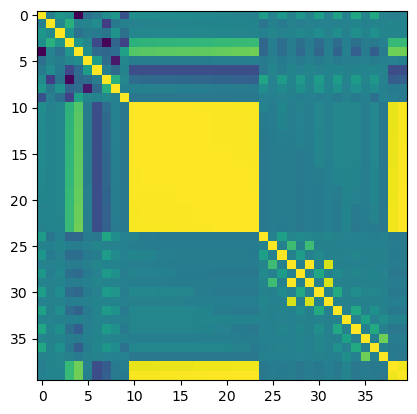

In [11]:
# cov matrix for 40 features
cov = np.corrcoef(X.T)
plt.imshow(cov)
plt.show()

In [26]:
temp = np.argsort(correlation)
print(temp)


# milestone 2 temp argsort of corr matrix


[ 4  3 38 23 39 22 21 20 19 17 18  5 15 16  1  9 13 14 29 27 25 31 37 12
 11  6 33 10 35 36 34  2 24 32  8  0  7 26 30 28]


In [34]:
# scatter plot for three most correlated feature and target
correlation = np.corrcoef(df.T)[:-1, -1]
# print(correlation[6])
print(correlation)
temp = np.argsort(correlation)
print(temp)



# milestone 2 correlations, raw sorted


[ 0.0796419  -0.06128885  0.33442014  0.39697445  0.30807996  0.1060146
 -0.70451479 -0.05697029 -0.05277419 -0.07356026  0.641312    0.64040464
  0.64040464  0.64039829  0.64041334  0.63881696  0.63882888  0.63637387
  0.63637387  0.6335669   0.63370708  0.63081227  0.63076117  0.62833479
  0.03530695 -0.0090469   0.01661653 -0.01943319  0.01064093 -0.01943319
  0.03211506 -0.01720246  0.04020203 -0.00287484  0.0273297  -0.00891783
  0.0258262  -0.02429623  0.61592022  0.62827199]
[ 6  9  1  7  8 37 27 29 31 25 35 33 28 26 36 34 30 24 32  0  5  4  2  3
 38 39 23 22 21 19 20 18 17 15 16 13 12 11 14 10]


In [41]:
print(sorted(np.abs(correlation)))
av_temp = np.argsort(np.abs(correlation))
av_temp

# milestone 2 correlations, sorted as absolute values

[0.0028748441628541196, 0.008917829140455929, 0.009046901236544894, 0.010640925795167918, 0.016616528910079073, 0.01720245780563928, 0.019433185595649907, 0.019433185595649907, 0.024296226752424478, 0.02582620430133633, 0.027329701051732613, 0.03211506117122077, 0.035306950332327856, 0.04020203378759955, 0.05277418814161673, 0.056970294145277905, 0.061288852660047966, 0.07356026312089133, 0.07964190054974578, 0.10601459861929727, 0.3080799621532908, 0.33442013907309565, 0.3969744453356405, 0.6159202211674142, 0.6282719851321911, 0.6283347894625325, 0.6307611698740028, 0.6308122682088417, 0.6335668974934873, 0.6337070768152011, 0.636373872247207, 0.636373872247207, 0.6388169578630334, 0.6388288800726142, 0.6403982947247882, 0.6404046428202611, 0.6404046428202611, 0.6404133411853217, 0.6413120025165505, 0.7045147870681108]


array([33, 35, 25, 28, 26, 31, 27, 29, 37, 36, 34, 30, 24, 32,  8,  7,  1,
        9,  0,  5,  4,  2,  3, 38, 39, 23, 22, 21, 19, 20, 18, 17, 15, 16,
       13, 12, 11, 14, 10,  6])

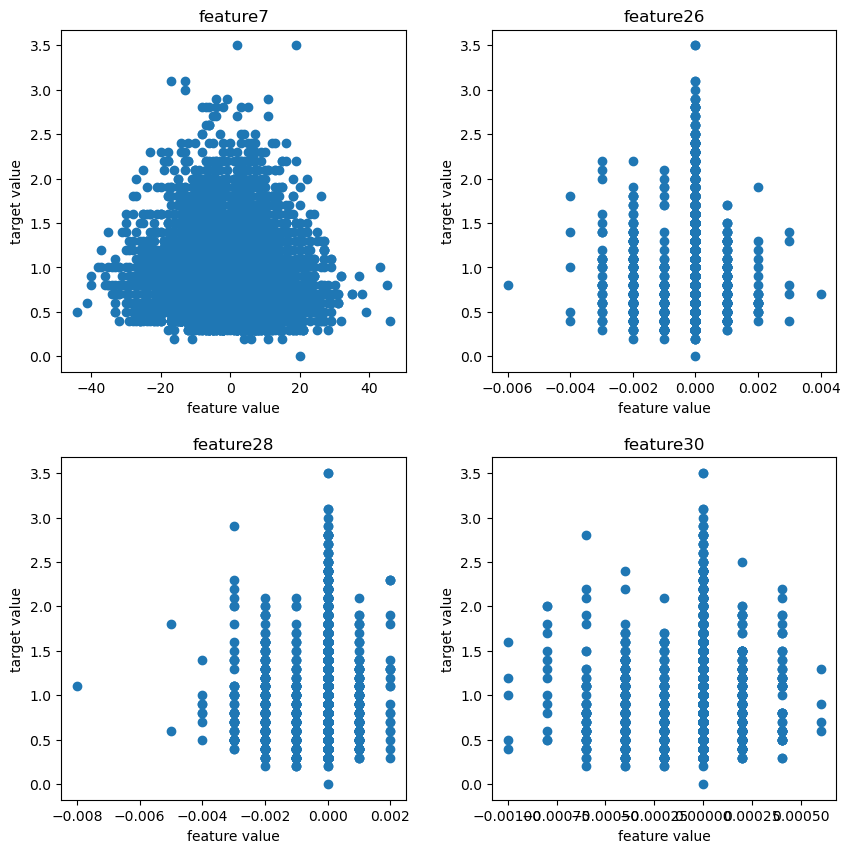

In [45]:
plt.figure(figsize=(10,10))
plt.subplots_adjust(wspace=0.25,hspace=0.25)
for i, n in enumerate(temp):
    feature = X.iloc[:, n]
    plt.subplot(2, 2, i+1)
    plt.title('feature' + str(n))
    plt.scatter(feature, y)
    plt.xlabel('feature value')
    plt.ylabel('target value')
plt.show()

ValueError: num must be an integer with 1 <= num <= 16, not 17

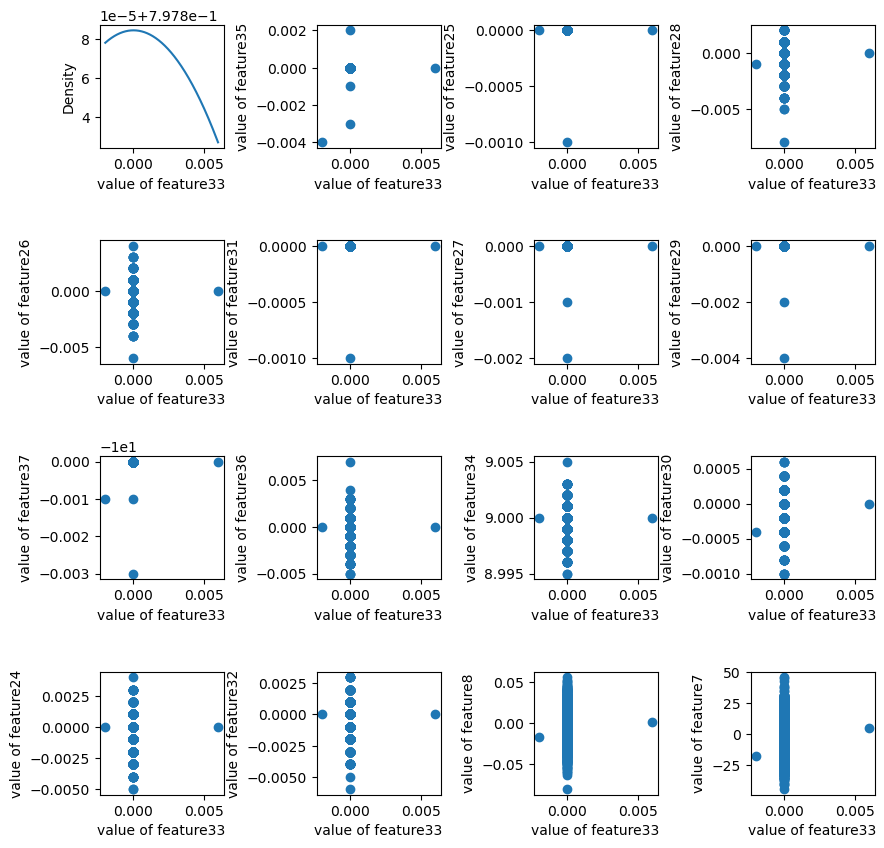

In [52]:
# choose a feature and find three most correlated feature, for example, 28 
# 33 35 25
# correlation = cov[:, [33,35,25]]
correlation = cov[:, 28]
temp = sorted(np.argsort(correlation)[-4:])

plt.figure(figsize=(10,10))
plt.subplots_adjust(wspace=0.75,hspace=0.75)
for i, temp1 in enumerate(av_temp):
    for j, temp2 in enumerate(av_temp):
        feature1 = X.iloc[:, temp1]
        feature2 = X.iloc[:, temp2]
        if i == j:
            kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(feature1.to_numpy().reshape(-1, 1))
            # create a set of x-values at which to evaluate the KDE
            x_vals = np.linspace(np.min(feature1), np.max(feature2), 1000).reshape(-1, 1)
            # get the corresponding y-values by evaluating the KDE at the x-values
            y_vals = np.exp(kde.score_samples(x_vals))
            plt.subplot(4, 4, 4*i+j+1)

            plt.plot(x_vals, y_vals)
            plt.xlabel('value of feature' + str(temp1))
            plt.ylabel('Density')
        else:
            plt.subplot(4, 4, 4*i+j+1)
            plt.scatter(feature1, feature2)
            plt.xlabel('value of feature' + str(temp1))
            plt.ylabel('value of feature' + str(temp2))
plt.show()

## Baseline Models

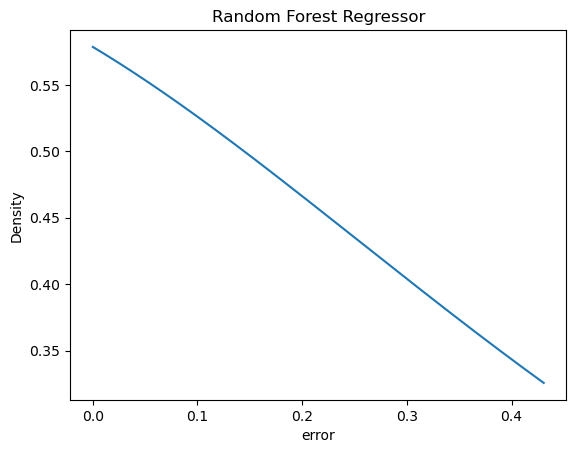

Random Forest Regressor in sample error: 0.0053280861952861944
Random Forest Regressor out sample error: 0.028790193939393943


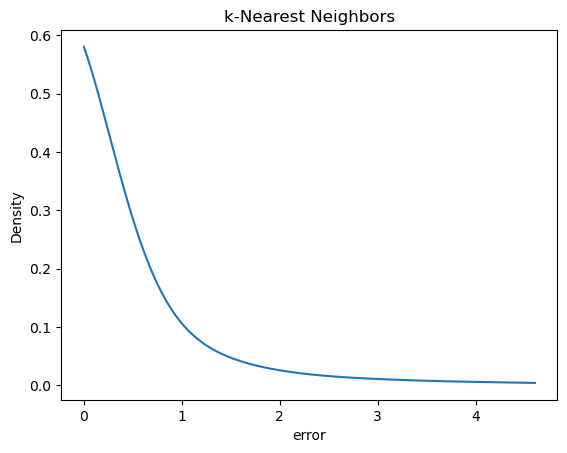

k-Nearest Neighbors in sample error: 0.07570949494949494
k-Nearest Neighbors out sample error: 0.1290675


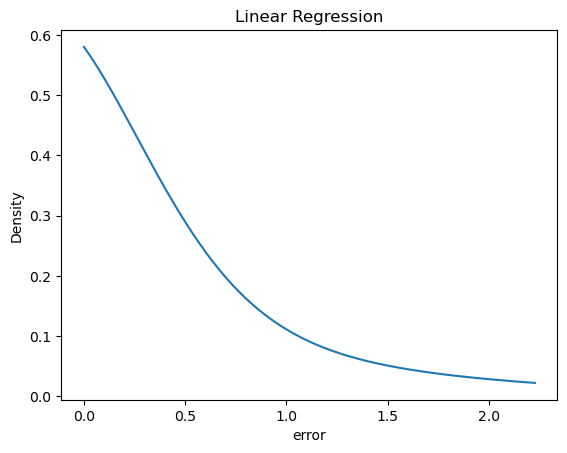

Linear Regression in sample error: 0.02956366217726798
Linear Regression out sample error: 0.030187214565511628
in sample t-Test
Random Forest Regressor and k-Nearest Neighbors TtestResult(statistic=-206.92857012805786, pvalue=7.313299036162618e-18, df=9)
Random Forest Regressor and Linear Regression TtestResult(statistic=-431.96879817584886, pvalue=9.721062554568724e-21, df=9)
k-Nearest Neighbors and Linear Regression TtestResult(statistic=137.36921550755497, pvalue=2.9175540344320846e-16, df=9)
out sample t-Test
Random Forest Regressor and knn TtestResult(statistic=-25.27462187793395, pvalue=1.1424840132530483e-09, df=9)
Random Forest Regressor and Linear Regression TtestResult(statistic=-2.4130825088101737, pvalue=0.03905112786523214, df=9)
k-Nearest Neighbors and Linear Regression TtestResult(statistic=24.815079035140784, pvalue=1.3447716953652279e-09, df=9)


In [44]:
# random forest regressor
kf = KFold(n_splits=10)
random_forest_regressor = RandomForestRegressor(n_estimators=10)
kng = KNeighborsRegressor(n_neighbors=4)
models = [('Random Forest Regressor', random_forest_regressor), ('k-Nearest Neighbors', kng),('Linear Regression', LinearRegression())]
in_sample_error = []
out_sample_error = []
for name, model in models:
    in_sample_err = []
    out_sample_err = []
    mse=[]
    for train, test in kf.split(X):
        model.fit(X.iloc[train], np.ravel(y.iloc[train]))
        model.fit(X.iloc[train], np.ravel(y.iloc[train]))
        predict_train = model.predict(X.iloc[train])
        predict_test = model.predict(X.iloc[test])
        predict = model.predict(X)
        mse.append((np.ravel(predict) - np.ravel(y))**2) 
        in_sample_err.append(MSE(predict_train, y.iloc[train]))
        out_sample_err.append(MSE(predict_test, y.iloc[test]))
    in_sample_error.append(in_sample_err)
    out_sample_error.append(out_sample_err)
    error = np.mean(mse, axis=0)
    zscore = (error-np.mean(error))/np.std(error)
    
    kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(zscore.reshape(-1,1))
    # create a set of x-values at which to evaluate the KDE
    x_vals = np.linspace(np.min(error), np.max(error), 1000).reshape(-1,1)
    # get the corresponding y-values by evaluating the KDE at the x-values 
    y_vals = np.exp(kde.score_samples(x_vals))
    # plot the KDE
    plt.title(name)
    plt.plot(x_vals, y_vals)
    plt.xlabel('error')
    plt.ylabel('Density')
    plt.show()
    print(name,'in sample error:',np.mean(in_sample_err))
    print(name,'out sample error:',np.mean(out_sample_err))
print('in sample t-Test')
print('Random Forest Regressor and k-Nearest Neighbors',stats.ttest_rel(in_sample_error[0], in_sample_error[1]))
print('Random Forest Regressor and Linear Regression',stats.ttest_rel(in_sample_error[0], in_sample_error[2]))
print('k-Nearest Neighbors and Linear Regression',stats.ttest_rel(in_sample_error[1], in_sample_error[2]))
print('out sample t-Test')
print('Random Forest Regressor and knn',stats.ttest_rel(out_sample_error[0], out_sample_error[1]))
print('Random Forest Regressor and Linear Regression',stats.ttest_rel(out_sample_error[0], out_sample_error[2]))
print('k-Nearest Neighbors and Linear Regression',stats.ttest_rel(out_sample_error[1], out_sample_error[2]))

In [16]:
# kde for z-score error for each model

## Milestone 2

In [17]:
from sklearn.preprocessing import StandardScaler, normalize

In [18]:
df.isna().values.any()

False

In [19]:
new_df = df.to_numpy()
new_df
demo_var = StandardScaler().fit(new_df)
demo_var.scale_

new_df.std()

40.951701378014036

In [20]:
# from sklearn.preprocessing import normalize
# import numpy as np

# Create sample data
# X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# Normalize the data using L2 normalization
X_normalized = normalize(new_df, norm='l2')


In [21]:
X_normalized

array([[-7.41091322e-01,  5.25935777e-01,  2.69541333e-02, ...,
         8.04376305e-03,  1.19530858e-03,  3.34686403e-02],
       [ 9.69525054e-01, -2.09627039e-01,  7.14526923e-03, ...,
        -3.63255977e-03,  8.38508155e-05,  2.62033798e-03],
       [ 9.89854642e-01, -9.89854642e-02,  4.62631044e-03, ...,
        -5.33526256e-03,  1.04808139e-04,  2.91133718e-03],
       ...,
       [ 9.95693740e-01, -8.32056050e-03,  2.36343798e-03, ...,
        -1.41678517e-03,  6.65644840e-05,  2.21881613e-03],
       [ 9.98877541e-01,  2.51606433e-03,  2.29950966e-03, ...,
        -1.74400290e-03,  4.52891580e-05,  2.26445790e-03],
       [ 9.98867496e-01, -1.09967064e-02,  2.60084486e-03, ...,
        -6.53708272e-04,  4.21540411e-05,  2.74917659e-03]])